# 6.6 Sourcing & Analyzing The World Happiness Report Time Series Data

### Objective of Script:

### 1. Import libraries 
### 2. Import dataframe
### 3. Dimensions Check 
### 4. Data Consistency Checks
### 5. Year Indexing
### 6. Time series analysis: decomposition
### 7. Testing for stationarity
### 8. Stationarizing the World Happiness Report Data (2015-2019)

## 01. Import Libraries

In [1]:
# Importing Libararies

import quandl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Import Dataframe

In [3]:
# Import dataframes by creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020'
print(path)

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/6 Advanced Analytics and Dashboard Design/World Happiness Report Jun2020


In [4]:
# Import merged WHR dataframe with all columns

WHR_ALLYEARS = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'WHR_ALLYEARS.pkl')) 

# Importing individual WHR dataframes (2015-2019); extra data 

WHRC_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2015.csv'), index_col = False)
WHRC_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2016.csv'), index_col = False)
WHRC_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2017.csv'), index_col = False)
WHRC_2018 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2018.csv'), index_col = False)
WHRC_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHRC_2019.csv'), index_col = False)

## 03. Dimension Check

In [5]:
# Dimension check summary of WHR 

def check_df(WHR_ALLYEARS, head=5): 
    print('---------- WHR All Years Summary -----------')
    print('********** SHAPE **********')
    print(WHR_ALLYEARS.shape)
    print(' ')
    print('********** COLUMNS **********')
    print(WHR_ALLYEARS.columns.to_list())
    print(' ')
    print('*********** DATA TYPES ***********')
    print(WHR_ALLYEARS.dtypes)
    print(' ')
    print('********** FIRST FIVE ROWS ***********')
    print(WHR_ALLYEARS.head(head))
    print(' ')         
    print('********** LAST FIVE ROWS **********')       
    print(WHR_ALLYEARS.tail(head))        
        
check_df(WHR_ALLYEARS)

---------- WHR All Years Summary -----------
********** SHAPE **********
(777, 11)
 
********** COLUMNS **********
['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity', 'Health', 'Trust']
 
*********** DATA TYPES ***********
Year                 int64
Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
Economy            float64
Family             float64
Freedom            float64
Generosity         float64
Health             float64
Trust              float64
dtype: object
 
********** FIRST FIVE ROWS ***********
   Year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   

## 04. Data Consistency Check

### Duplicate Check

In [6]:
WHR_ALLYEARS.duplicated()

# No duplicates observed

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 777, dtype: bool

### Missing Value Check 

In [7]:
WHR_ALLYEARS.isnull().sum()

# Single n/a value in Trust column

Year               0
Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Economy            0
Family             0
Freedom            0
Generosity         0
Health             0
Trust              1
dtype: int64

In [8]:
# Replace missing value with mean value determined in previous data scripts (6.5)

WHR_ALLYEARS.fillna(0.311975, inplace=True)

In [9]:
# View if missing value was replaced with mean value

WHR_ALLYEARS.loc[(WHR_ALLYEARS)['Country'] == 'United Arab Emirates']

Year               Country                           Region  \
19  2015  United Arab Emirates  Middle East and Northern Africa   
27  2016  United Arab Emirates  Middle East and Northern Africa   
20  2017  United Arab Emirates  Middle East and Northern Africa   
19  2018  United Arab Emirates  Middle East and Northern Africa   
20  2019  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy  Family  Freedom  Generosity  \
19              20            6.901   1.4273  1.1258   0.6416      0.2643   
27              28            6.573   1.5735  0.8711   0.5622      0.2659   
20              21            6.648   1.6263  1.2664   0.6083      0.3609   
19              20            6.774   2.0960  0.7760   0.2840      0.1860   
20              21            6.825   1.5030  1.3100   0.5980      0.2620   

    Health     Trust  
19  0.8093  0.385800  
27  0.7299  0.355600  
20  0.7268  0.324500  
19  0.6700  0.311975  
20  0.8250  0.182000

## 05. Year Indexing

In [10]:
# View first five rows of dataframe

WHR_ALLYEARS.head()

Year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   
4  2015       Canada   North America               5            7.427   

   Economy  Family  Freedom  Generosity  Health   Trust  
0   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198  
1   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415  
2   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836  
3   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650  
4   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

In [11]:
# Remove columns that are categorical 

whr_allyearssub = WHR_ALLYEARS.drop(columns = ['Country', 'Region', 'Happiness Rank'])
whr_allyearssub.head()

Year  Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust
0  2015            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198
1  2015            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415
2  2015            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836
3  2015            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650
4  2015            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

In [12]:
# Convert 'Year' column to datetime
whr_allyearssub['Year'] = pd.to_datetime(whr_allyearssub['Year'], format='%Y')

# Extract the year from the datetime and set it as the index
whr_allyearssub['Year'] = whr_allyearssub['Year'].dt.year
whr_allyearssub.set_index('Year', inplace=True)

In [13]:
# View first five rows to confirm index change

whr_allyearssub.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust
Year                                                                       
2015            7.587   1.3965  1.3495   0.6656      0.2968  0.9414  0.4198
2015            7.561   1.3023  1.4022   0.6288      0.4363  0.9478  0.1415
2015            7.527   1.3255  1.3606   0.6494      0.3414  0.8746  0.4836
2015            7.522   1.4590  1.3310   0.6697      0.3470  0.8852  0.3650
2015            7.427   1.3263  1.3226   0.6330      0.4581  0.9056  0.3296

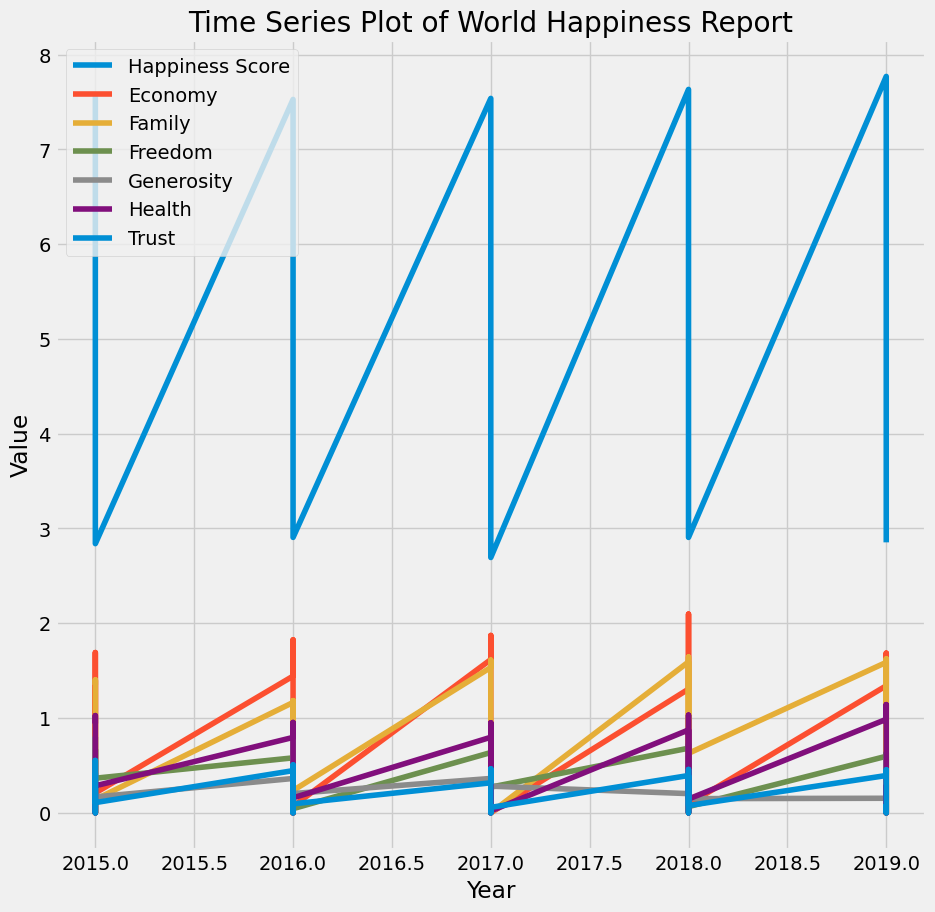

In [14]:
# Plot the subset dataframe 

whr_allyearssub.plot(figsize=(10, 10))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Plot of World Happiness Report')
plt.legend(loc='upper left')
plt.show()

# 06. Time Series Analysis: Decomposition

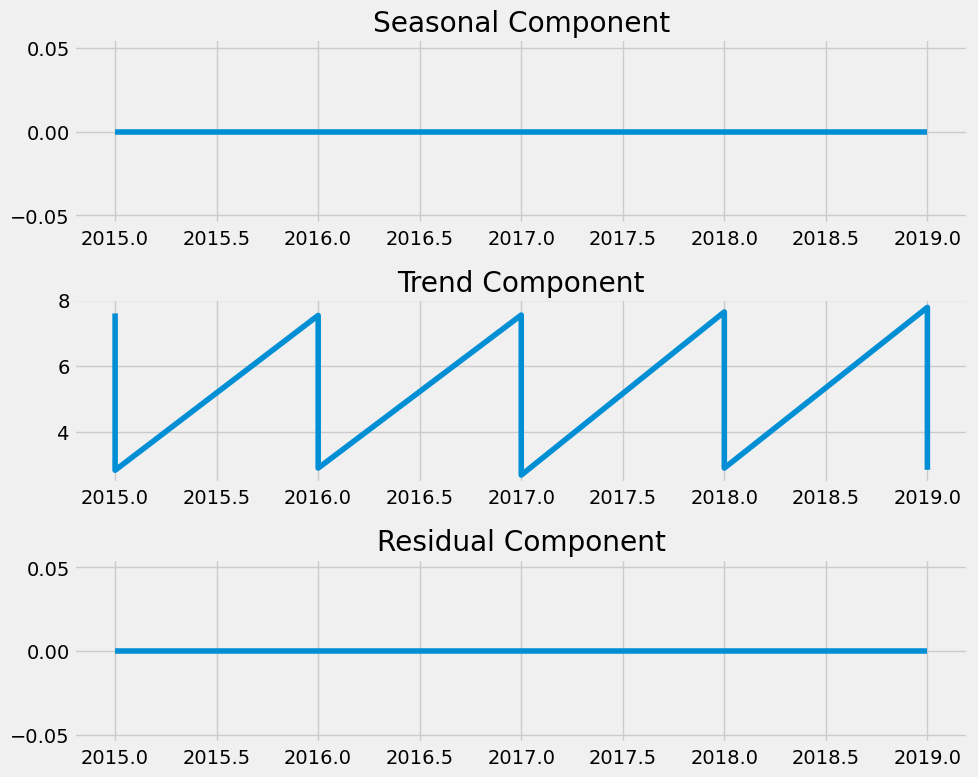

In [15]:
period_value = 1
decomposition = sm.tsa.seasonal_decompose(whr_allyearssub.iloc[:, 0], model = 'additive', period = period_value)

# Extract the individual components
seasonal_component = decomposition.seasonal
trend_component = decomposition.trend
residual_component = decomposition.resid

# Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(seasonal_component)
plt.title('Seasonal Component')

plt.subplot(3, 1, 2)
plt.plot(trend_component)
plt.title('Trend Component')

plt.subplot(3, 1, 3)
plt.plot(residual_component)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# 07. Testing for Stationary

### The Dicker Fuller Test

In [16]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller1(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Happiness Score')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller1(whr_allyearssub['Happiness Score'])

Dickey-Fuller Stationarity test: Happiness Score
Test Statistic                  -4.273091
p-value                          0.000494
Number of Lags Used              0.000000
Number of Observations Used    776.000000
Critical Value (1%)             -3.438805
Critical Value (5%)             -2.865272
Critical Value (10%)            -2.568757
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [17]:
# Economy Variable 

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller2(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Economy')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller2(whr_allyearssub['Economy'])

Dickey-Fuller Stationarity test: Economy
Test Statistic                  -4.084360
p-value                          0.001028
Number of Lags Used              6.000000
Number of Observations Used    770.000000
Critical Value (1%)             -3.438871
Critical Value (5%)             -2.865301
Critical Value (10%)            -2.568773
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [18]:
# Family Variable

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller3(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Family')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller3(whr_allyearssub['Family'])

Dickey-Fuller Stationarity test: Family
Test Statistic                  -4.315363
p-value                          0.000418
Number of Lags Used              4.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [19]:
# Freedom Variable

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller4(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Freedom')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller4(whr_allyearssub['Freedom'])

Dickey-Fuller Stationarity test: Freedom
Test Statistic                  -5.003422
p-value                          0.000022
Number of Lags Used              7.000000
Number of Observations Used    769.000000
Critical Value (1%)             -3.438882
Critical Value (5%)             -2.865306
Critical Value (10%)            -2.568775
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [20]:
# Generosity Variable 

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller5(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Generosity')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller5(whr_allyearssub['Generosity'])

Dickey-Fuller Stationarity test: Generosity
Test Statistic                -7.659504e+00
p-value                        1.703502e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    7.710000e+02
Critical Value (1%)           -3.438860e+00
Critical Value (5%)           -2.865296e+00
Critical Value (10%)          -2.568770e+00
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [21]:
# Health Variable 

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller6(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Health')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller6(whr_allyearssub['Health'])

Dickey-Fuller Stationarity test: Health
Test Statistic                  -3.941052
p-value                          0.001753
Number of Lags Used              6.000000
Number of Observations Used    770.000000
Critical Value (1%)             -3.438871
Critical Value (5%)             -2.865301
Critical Value (10%)            -2.568773
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

In [22]:
# Trust Variable 

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller7(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test: Trust')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller7(whr_allyearssub['Trust'])

Dickey-Fuller Stationarity test: Trust
Test Statistic                  -4.267196
p-value                          0.000506
Number of Lags Used             14.000000
Number of Observations Used    762.000000
Critical Value (1%)             -3.438961
Critical Value (5%)             -2.865340
Critical Value (10%)            -2.568794
dtype: float64


##### The Test Statistic value is smaller than the critical value therefore: can reject the null hypothesis.  
##### The p-valuse is less than 0.05 suggesting a 95% confidence level; reject the null hypothesis (the results were significant).
##### Can reject null hypothesis, data is stationary.

### Autocorrelations

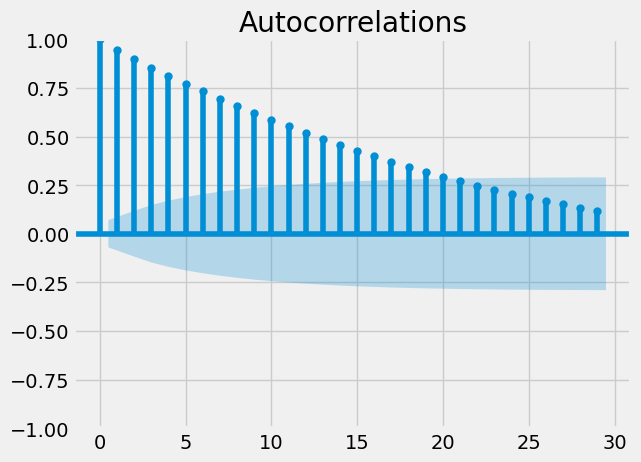

In [23]:
# Display autocorrelations between the lags 


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

whr_allyearssub1 = whr_allyearssub.iloc[:,0].values
plot_acf(whr_allyearssub1)
plt.title('Autocorrelations')
plt.show()

## 08. Stationarizing the World Happiness Report Data (2015-2019)

In [24]:
# Calculating the difference between every value (t) and its lag (t -1) and storing the results in a new dataframe

data_diff1 = whr_allyearssub - whr_allyearssub.shift(1)

In [25]:
# Remove the missing values

data_diff1.dropna(inplace = True)

In [26]:
# View the first five rows

data_diff1.head()

Happiness Score  Economy  Family  Freedom  Generosity  Health   Trust
Year                                                                       
2015           -0.026  -0.0942  0.0527  -0.0368      0.1395  0.0064 -0.2783
2015           -0.034   0.0232 -0.0416   0.0206     -0.0949 -0.0732  0.3421
2015           -0.005   0.1335 -0.0296   0.0203      0.0056  0.0106 -0.1186
2015           -0.095  -0.1327 -0.0084  -0.0367      0.1111  0.0204 -0.0354
2015           -0.021  -0.0360 -0.0043   0.0087     -0.2246 -0.0165  0.0841

In [27]:
# Viewing the columns

data_diff1.columns

Index(['Happiness Score', 'Economy', 'Family', 'Freedom', 'Generosity',
       'Health', 'Trust'],
      dtype='object')

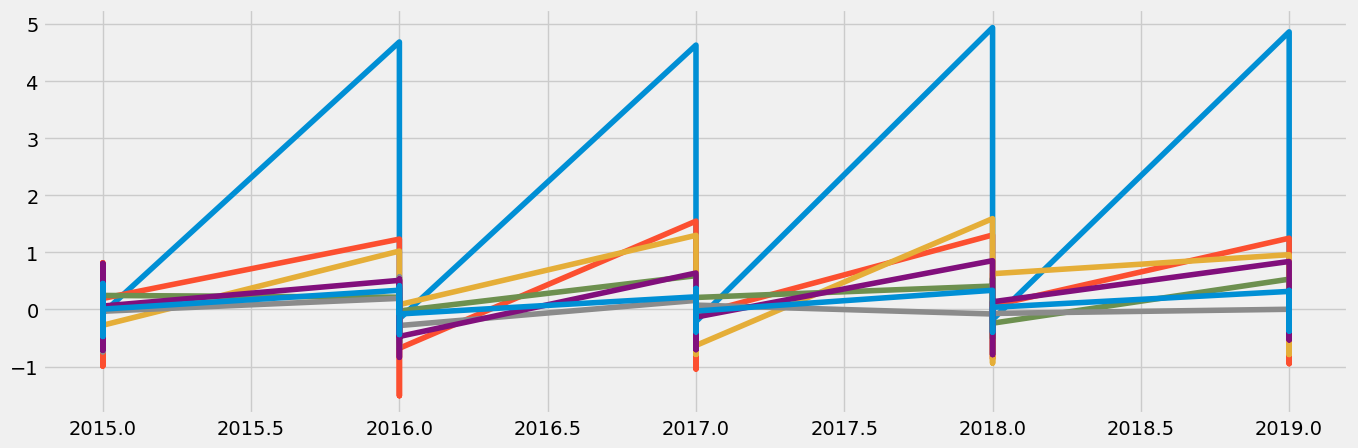

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

### The Dickey Fuller Test & Autocorrelations

In [29]:
# Run the Dickey-Fuller test after stationarizing; Happiness Score variable

dickey_fuller1(data_diff1['Happiness Score'])

Dickey-Fuller Stationarity test: Happiness Score
Test Statistic                 -28.753179
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    775.000000
Critical Value (1%)             -3.438816
Critical Value (5%)             -2.865277
Critical Value (10%)            -2.568760
dtype: float64


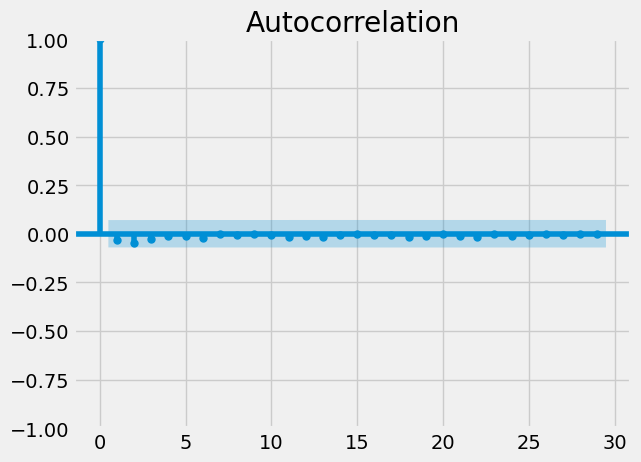

In [30]:
# Recheck the autocorrelations; Happiness Score

plot_acf(data_diff1['Happiness Score'])
plt.show()

In [31]:
# # Run the Dickey-Fuller test after stationarizing; Economy variable

dickey_fuller2(data_diff1['Economy'])

Dickey-Fuller Stationarity test: Economy
Test Statistic                -1.653043e+01
p-value                        2.025916e-29
Number of Lags Used            5.000000e+00
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64


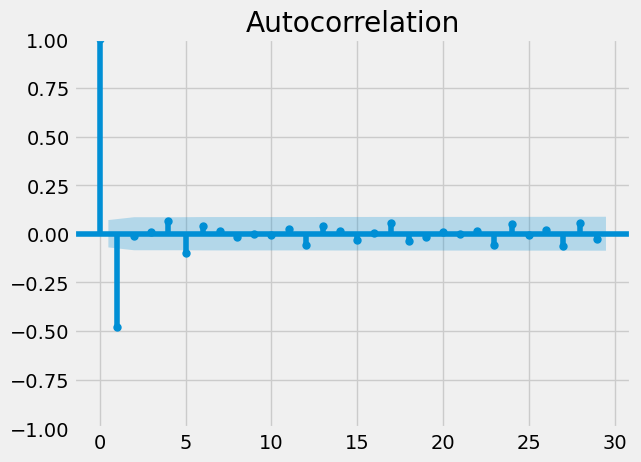

In [32]:
# Recheck the autocorrelations; Economy

plot_acf(data_diff1['Economy'])
plt.show()

In [33]:
# Run the Dickey-Fuller test after stationarizing; Family variable

dickey_fuller3(data_diff1['Family'])

Dickey-Fuller Stationarity test: Family
Test Statistic                -1.633880e+01
p-value                        3.010151e-29
Number of Lags Used            5.000000e+00
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64


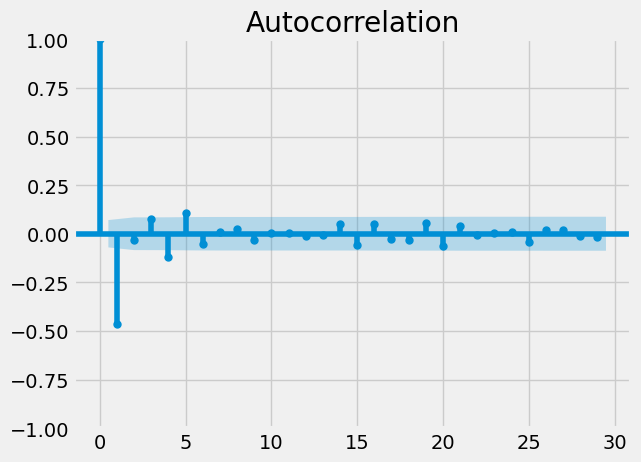

In [34]:
# Recheck the autocorrelations; Family

plot_acf(data_diff1['Family'])
plt.show()

In [35]:
# Run the Dickey-Fuller test after stationarizing; Freedom variable

dickey_fuller4(data_diff1['Freedom'])

Dickey-Fuller Stationarity test: Freedom
Test Statistic                -1.212551e+01
p-value                        1.784516e-22
Number of Lags Used            1.100000e+01
Number of Observations Used    7.640000e+02
Critical Value (1%)           -3.438938e+00
Critical Value (5%)           -2.865330e+00
Critical Value (10%)          -2.568788e+00
dtype: float64


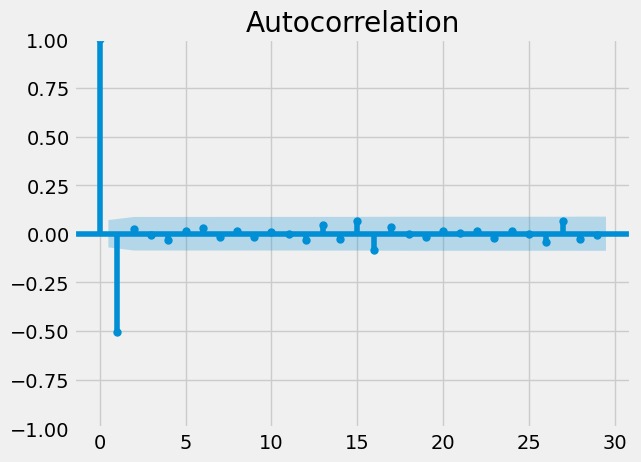

In [36]:
# Recheck the autocorrelations; Freedom

plot_acf(data_diff1['Freedom'])
plt.show()

In [37]:
# Run the Dickey-Fuller test after stationarizing; Generosity variable

dickey_fuller5(data_diff1['Generosity'])

Dickey-Fuller Stationarity test: Generosity
Test Statistic                -1.165269e+01
p-value                        2.019487e-21
Number of Lags Used            1.600000e+01
Number of Observations Used    7.590000e+02
Critical Value (1%)           -3.438995e+00
Critical Value (5%)           -2.865355e+00
Critical Value (10%)          -2.568802e+00
dtype: float64


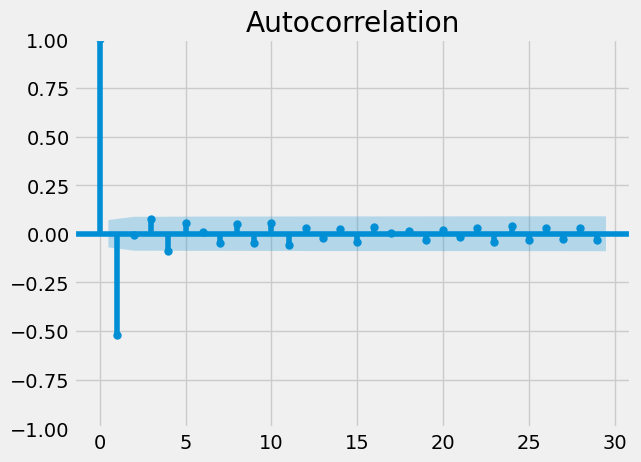

In [38]:
# Recheck the autocorrelations; Generosity

plot_acf(data_diff1['Generosity'])
plt.show()

In [39]:
# Run the Dickey-Fuller test after stationarizing; Health variable

dickey_fuller6(data_diff1['Health'])

Dickey-Fuller Stationarity test: Health
Test Statistic                -1.716841e+01
p-value                        6.768790e-30
Number of Lags Used            5.000000e+00
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64


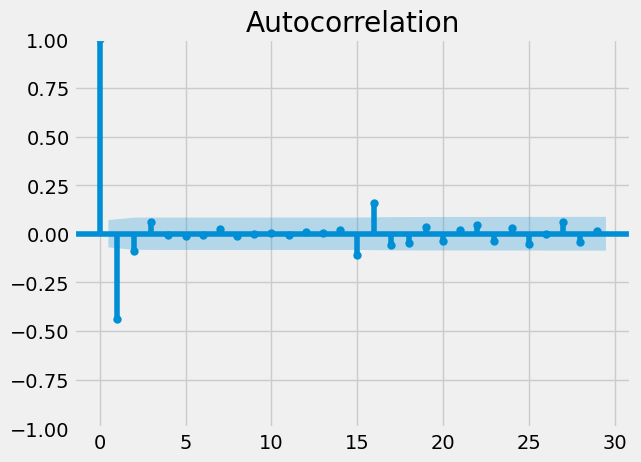

In [40]:
# Recheck the autocorrelations; Health

plot_acf(data_diff1['Health'])
plt.show()

In [41]:
# Run the Dickey-Fuller test after stationarizing; Trust variable

dickey_fuller7(data_diff1['Trust'])

Dickey-Fuller Stationarity test: Trust
Test Statistic                -1.023083e+01
p-value                        5.034044e-18
Number of Lags Used            1.300000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


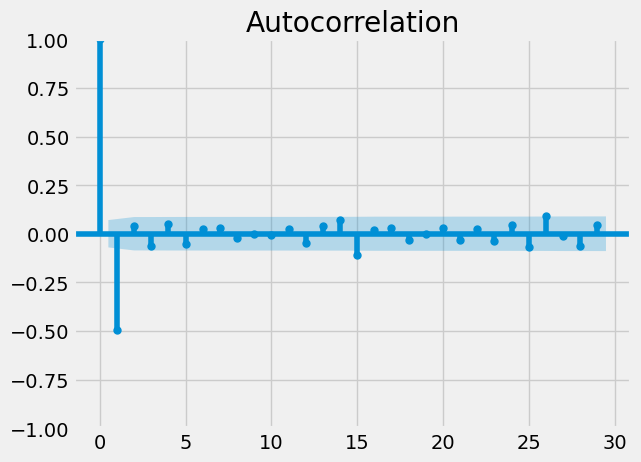

In [42]:
# Recheck the autocorrelations; Trust

plot_acf(data_diff1['Trust'])
plt.show()

##### Autocorrelations of columns show linear line and very few points outside the confidence level.  